# A world tour of patent application

The purpose of our project is to extract valuable insights about research trends around the world and shed some light on popular technologies by analyzing granted patents throughout years. 

**In the first part of the project**, we start by giving summaries and statistics about patents according to countries and companies. We analyze the evolution of granted patents over time with the purpose of extracting meaningful informations relative to various sectors. 

**In the second part of the project**, we dive deeper in the analysis and explore some of the most popular technology sectors of the 21st century: 
        1. Energy 
        2. FinTech  
        3. Artificial Intelligence 

Most part of the project is structured around these three sectors. We study them comprehensively in order to understand their evolution in the time and reveal their relationships with belonging companies and countries.

**Important:** In order to keep the notebook shorter and more to the point, the core implementation is contained in the python file **implementations.py**, which carefully and thouroughly describes the purpose of each function. We kindly invite you to have a look at it. We will however give a brief description of what a functions does when it is first used.

In [19]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import requests
from bs4 import BeautifulSoup
import folium
import json
import branca.colormap as cm
import warnings
import pickle
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


The file **patent_implementation.py** contains the definitions of the functions used throughout the notebook.

In [20]:
from patent_implementation import *

In order to manipulate the database, an API is provided. The latter will allow us to send queries which always start with the following base URL **BASE_URL 'http://www.patentsview.org/api/patents/query?'**

In ***implementations.py***, the function BASE_URL() returns this base URL as a helper function. 

It is possible to request a specific research by keywords.
For exemple we could search (using q) for all the patents granted since April 2007 and display the patent number and patent granted date (using f).

    Here is a simple example:
#### [http://www.patentsview.org/api/patents/query?q={"_gte":{"patent_date":"2007-01-04"}}&f=["patent_number","patent_date"]](http://www.patentsview.org/api/patents/query?q={"_gte":{"patent_date":"2007-01-04"}}&f=["patent_number","patent_date"])

With all that being said, let's move the the analysis part!

# 1. A General Analysis on Granted Patents


We divided this part into following subsections.

    1. The evolution of granted patents around the world the past 10 years (from 2007 to 2017)
    2. The number of USPTO granted patent by countries
    3. A colorful map highlighting the dispertion of patents around the world
    4. The top companies delivering patents 
    5. The top countries delivering patents by general sectors in CPC (Cooperative Patent Classification)
    6. Spider charts for the top patents delivered countries displaying the popular sectors

### 1.1 Number of granted patents over the past 10 years

This section aims to display the evolution of granted patent from January 1996 to January 2017

The API cannot return more than 100000 patents in one request. Thus, we need to collect the number of patents by months first and then aggregate the results to obtain the number of patents over a year.

Let's display the number of granted patents in a table. We use **get_nb_patents_year** to get the number of granted patent for a given year (12 months).

In [61]:
years = list(range(1996,2017))
list_nb_patent=[get_nb_patents_year(str(year)) for year in years]
df_nb_patent=pd.DataFrame(index=years)
df_nb_patent['nb_patents']=list_nb_patent
df_nb_patent

,nb_patents
1996,118804
1997,122689
1998,162320
1999,169151
2000,176722
2001,187170
2002,178957
2003,184696
2004,188947
2005,157811


In [22]:
savedfexcel(df_nb_patent ,'df_nb_patents')
dfNbPatent=pd.read_excel('df_nb_patents.xlsx')

We can plot the numbers to have a better visualization of the number of granted patent.

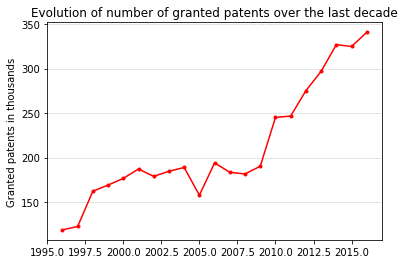

In [63]:
plot(years, df_nb_patent['nb_patents']/1000, 'r', marker= '.')
plt.ylabel('Granted patents in thousands')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.title("Evolution of number of granted patents over the last decade")
plt.show()

### 1.2 Number of granted patent delivered by countries

This section aims to display which countries are the top patent providers. In a given patent, multiple inventors might be cited. Those inventors can be located in different countries. In that case, +1 will be counted for a country if at least one of the inventor is in the given country. The number of patents between January 2016 and January 2017 was chosen for this study.

First, we read the excel file **location.xlsx** given by the USPTO website which contains all the countries which have delivered patents in the past. The country names are coded according to the Alpha-2 ISO norm ("US","GE","FR","CH",...)

In [24]:
dfLocation=pd.read_excel(os.getcwd()+'/data/location.xlsx').fillna('')

We clean the countries list and keep the Alpha-2 ISO codes only 

In [50]:
countries=list(set(list(dfLocation['country'])))
countries = [countries[i] for i in range(len(countries)) if (len(countries[i]) == 2 and countries[i]!='a"')]

The **get_nb_patent_country** function below returns the number of granted patents for a given country. It might be possible that some countries issue a large number of patents that exceeds 100'000 in the year which overwhelms the API capacity. In that case the API request is splited between the 6 first and 6 last months of the year, and the number of patents are summed up together. 

In [64]:
dfNbPatents=pd.DataFrame(columns=['country','nb_patents'])
dfNbPatents['country']=countries
dfNbPatents['nb_patents']=list(map(lambda x: get_nb_patent_country(x),dfNbPatents['country']))

We just created the dataframe containing the patents data grouped by countries.

The number of patents are sorted by country and the barplot is displayed. We chose to plot the 15 top countries

,country,nb_patents
24,US,168433
49,JP,53234
47,KR,22631
192,DE,19827
55,CN,14093
...,...,...
13,VI,0
12,MV,0
11,VC,0
10,SR,0


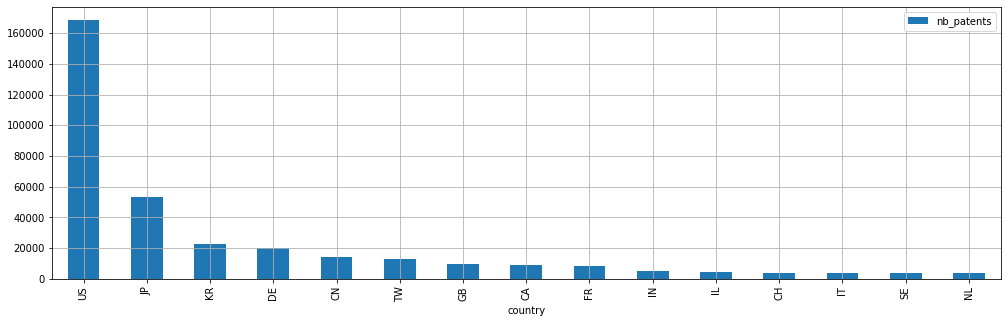

In [66]:
dfNbPatents.sort_values(by='nb_patents',inplace=True, ascending=False)
dfNbPatents.head(15).plot.bar(x='country', y='nb_patents', figsize=(17,5), grid=True)

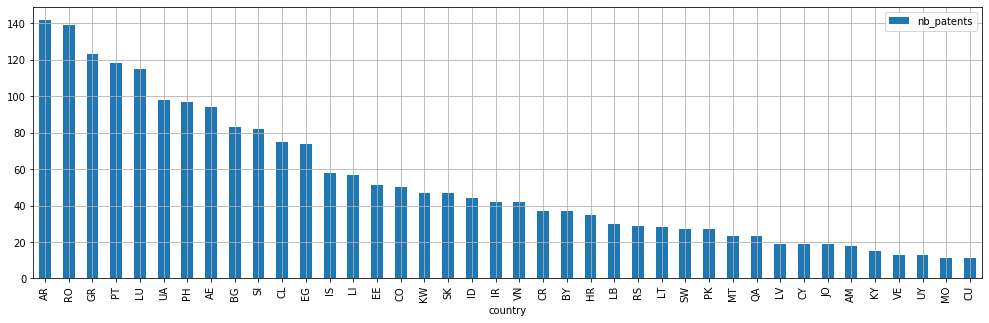

In [60]:
remove_null = df = dfNbPatents[dfNbPatents['nb_patents'] > 10]
remove_null.sort_values(by='nb_patents',inplace=True, ascending=False)
remove_null.tail(40).plot.bar(x='country', y='nb_patents', figsize=(17,5), grid=True)

Display the exact number for the 10 top patent delivered countries

In [28]:
dfNbPatents.set_index(pd.Series(list(range(1,len(dfNbPatents) + 1))), inplace=True)
dfNbPatents.head(10)

,country,nb_patents
1,US,168433
2,JP,53234
3,KR,22631
4,DE,19827
5,CN,14093
6,TW,13132
7,GB,9524
8,CA,8815
9,FR,8346
10,IN,5226


### 1.3 Choropleth map  of the granted patent distribution around the world


This section aims to display a vizual world map that highlights the granted patent dispersion across the countries. 

As there is a very large gap between the number of patents throughout the different countries, we opted for a **logarithmic scale** for a better vizualisation. Without loss of generality, we shall still be able to vizualize accurate relative differences between numbers.   

In [30]:
# max_n is the maximum number of patents holder, which is the US
max_n = dfNbPatents['nb_patents'].max()
#Here, we set up a Colormap using the logarithmic scale as shades of Blue colors that will be used to color the map
#colormap = cm.linear.PuBu.scale(0, round(math.log(max_n))).to_step(100)

In [31]:
patents = dfNbPatents.copy()
#Take the log of the number of granted patents to match the logarithmic scale
log_nb = list(map(lambda x: math.log(x) if (x > 0) else 0 , patents['nb_patents']))
#In the below DataFrame, each country has now its 'logarithmic color code'
patents['log_color_code'] = log_nb
patents.head()

,country,nb_patents,log_color_code
1,US,168433,12.034293
2,JP,53234,10.882453
3,KR,22631,10.027076
4,DE,19827,9.894800
5,CN,14093,9.553433


In [32]:
#We need also to convert the table into a dictionnary, in order to map a feature to its number of patents.
patents_dict = patents.set_index('country')['log_color_code']

#Here we map each country to a color according to the "logarithmic" number of patents
#color_dict = {key: colormap(patents_dict[key]) for key in patents_dict.keys()}

The function **ret_color** below, applies colors to the countries that were previously stored in **color_dict**.
In case a country does not appear in the list of patents, we assign the white color by default.

The JSON file **custom.geo.json** contains informations about the world countries. It is used to draw a Choropleth below.

We can now draw a chloropleth map that shows the number of patents around the world.

In [35]:
m = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=2)  

#Load the world map
countries_geo_path = 'data/custom.geo.json'
geo_json_data = json.load(open(countries_geo_path))

#Apply the colors using our defined function ret_color, desribed above
folium.GeoJson(geo_json_data,
               style_function=lambda feature: {
#               'fillColor': ret_color(feature, color_dict),
              'weight': .5,
              'fillOpacity': 0.8
               }).add_to(m)

#Setting up the scale 
# colormap = cm.linear.PuBu.scale(0, 170000).to_step(50)
# colormap.caption = 'Number of patents'
# m.add_child(colormap)

m.save('world.html')

Here is an overview of the distribution of granted patents over the world 

**The interactive map can be accessed [here](https://skagankose.github.io/ada_fall_2017/world.html).**

![Image](data/world_patent.png)

### GRANTED VS PENDING

Upon our initial milestone 2 objective, we wanted to compare how many patents application are granted. After digging deeper in the DataBase we found out that we can only obtain the granted patents. Therefore it will not be possible to carry out this comparison.

### 1. 4 TOP COMPANIES


This section aims to display the top companies patent publishers in the world. The function **get_company** below returns a dictionnary containing the companies as keys and their related number of patent application. 

To have a recent and significant number of patents we chose to analyse the patent applications over a recent period, namely here from the 1st of january 2017 to the 1st of may 2017. 

In [36]:
# DataFrame containing patent counts by companies
company_patent_df = pd.DataFrame(list(get_company(2017, 1, 2017, 5).items()))
# Cleaning NaNs
company_patent_df.dropna(inplace=True)
# Changing columns names
company_patent_df.columns = ['company', 'total_patent']
# Converting to integers
company_patent_df.total_patent = company_patent_df.total_patent.astype('int64', copy=False)
# Descending sort by number of granted patents
top_companies_df = company_patent_df.sort_values(by='total_patent', ascending=False)

Here is the list of the TOP15 world patent issuers companies, in terms of number of granted patents:

In [37]:
top_companies_df.head(15)

,company,total_patent
11,International Business Machines Corporation,133416
117,"Samsung Electronics Co., Ltd.",88887
640,Canon Kabushiki Kaisha,73693
785,Sony Corporation,51845
458,Kabushiki Kaisha Toshiba,48566
168,General Electric Company,45821
1577,"Hitachi, Ltd.",44035
1557,Intel Corporation,40562
1299,Fujitsu Limited,36266
685,"Hewlett-Packard Development Company, L.P.",34682


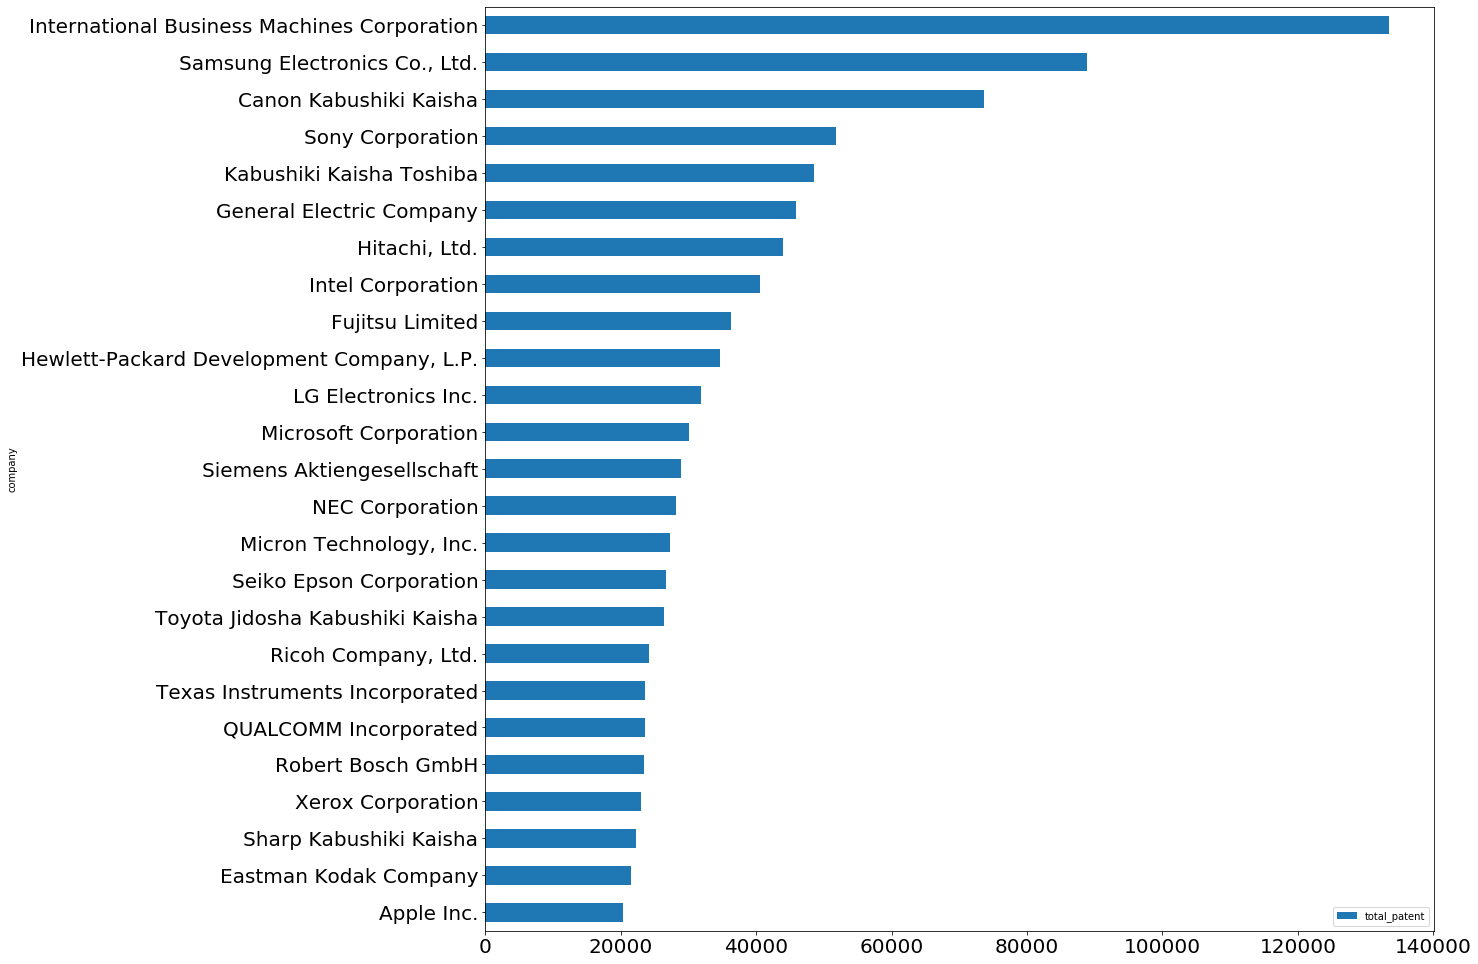

In [38]:
top_companies_df.head(25).plot.barh(x='company', y='total_patent', figsize=(17,17), fontsize=20).invert_yaxis()

As we can see **International Business Machines Corporation (IBM)** is the leader in terms of the number of granted patents by holding more than 120'000 patents, followed by Samsung Electronics (roughly 75'000) and Canon (75'000).

### 1.5 Patents by countries and sectors

The Cooperative Patent Classification (CPC) is a patent classification system, which has been jointly developed by the European Patent Office (EPO) and the United States Patent and Trademark Office (USPTO).

Patent categories according to CPC are indicated in the following table. We've used these categories for our initial analysis. We assigned a code to every categories for a paractical purpose.

| **CODE** | **DESCRIPTION**   |
|------|------|
|   **A**  | **Human Necessities**|
|   **B**  | **Operations and Transport**|
|   **C**  | **Chemistry and Metallurgy**|
|   **D**  | **Textiles**|
|   **E**  | **Fixed Constructions**|
|   **F**  | **Mechanical Engineering**|
|   **G**  | **Physics**|
|   **H**  | **Electricity**|
|   **Y**  | **Emerging Cross-Sectional Technologies**|

First we obtain the Alpha-2 codes for each country by reading **countries.csv**, which is provided by the **USPTO website** and initialise a dictionnary. The latter countains every countries and the number of patents by categories

In [39]:
# # The following DataFrame contains the Alpha-2 ISO names of the world countries 
country_abbrev = list(pd.read_csv('data/countries.csv')['alpha-2'])
country_total_patent_category = dict()
for abbrev in country_abbrev:
    country_total_patent_category[abbrev] = {"A":0,"B":0,"C":0,"D":0,"E":0,"F":0,"G":0,"H":0,"Y":0,}

The function **get_countries_by_sectors** send requests to get the number of patents delivered by company sorted by sector. We chose 2016 to illustrate our study.

In [40]:
country_total_patent_category = get_countries_by_sectors()

Create a dataframe containing every countries with their number of patents by sectors

In [41]:
patent_category_df = pd.DataFrame(country_total_patent_category).transpose()

The function defined below, **figure_by_sector**, plots the TOP10 leading countries for a given sector (as the category label ('A','B','C',...), in terms of granted patents. The tuple containing the index indicates the location of the plot.

Then, we plot the top 10 countries for each sectors

In [ ]:
#This function plot one country, it takes as parameter the category ('A','B','C',...),
#the label (Operations and Transport) and a tuple containing the index which indicate where is the
#plot located

#Label mapping
category_label = [('A', 'Human Necessities'),('B', 'Operations and Transport'),\
                  ('C', 'Chemistry and Metallurgys'),('D', 'Textiles'), ('E', 'Fixed Constructions'),\
                  ('F', 'Mechanical Engineering'),('G', 'Physics'),('H', 'Electricity'),\
                  ('Y', 'Emerging Cross-Sectional Technologies'),]
    
fix, axes = plt.subplots(5, 2, figsize=(20, 35))
for index, (category, label) in enumerate(category_label):
    fıgure_by_sector(category, label, (int(index/2), index%2), axes, patent_category_df)

An other way of visualizasing can be performed by plotting the number of patents by country and sector a a stacked bar chart.

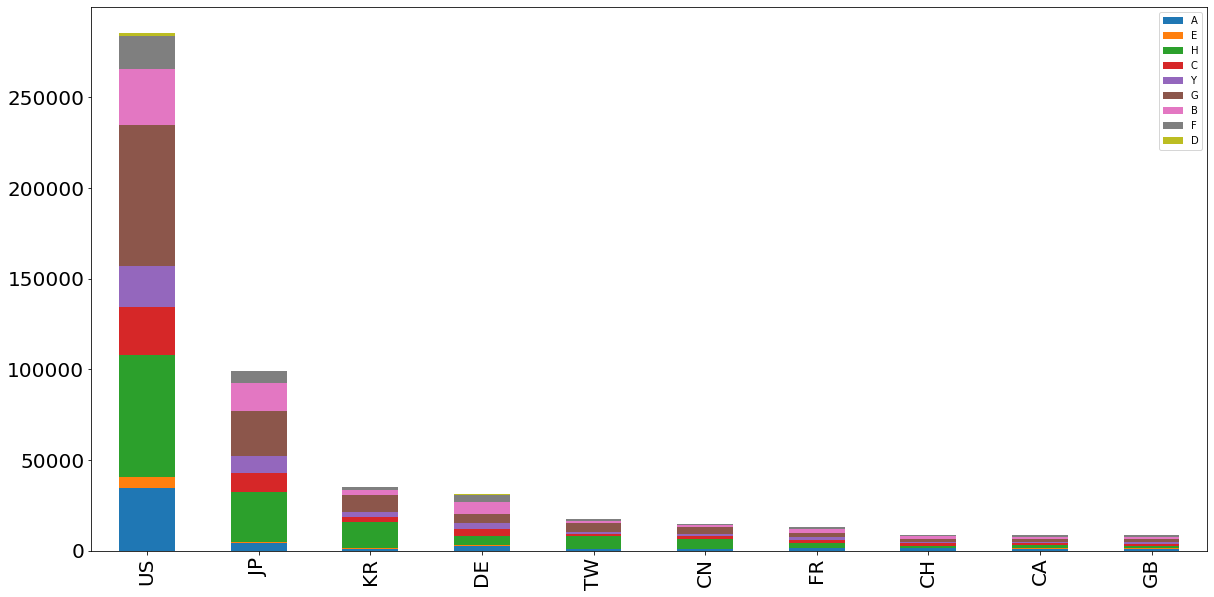

In [42]:
# Plot the TOP10 countries in terms of granted patents in a stacked bar chart
patent_category_df['total'] = patent_category_df.apply(sum, axis=1)
clean_df = patent_category_df.sort_values(by='total', ascending=False).drop('total',axis=1).head(10)
clean_df.plot.bar(stacked=True, fontsize=20, figsize=(20,10));

As we can see, the United States is the leader country in all sectors. Japan also has also a significant number of patents in terms of sectors G and H. Other countries as Germany (DE), South Korea (KR), Taiwan (TW), France (FR), Netherlands (NL), Switzerland (CH), China (CN) and United Kingdom (GB) comes next with less significant number of patents.

### 1.6 Spider charts modeling the different patent sectors in different countries

This function sorts the DataFrame containing the categorized patents for each country, by the given column passed as a parameter.

In [43]:
def sortby(col):
    return cat_patent.sort_values(by=col, ascending=False)

As an example, this DataFrame represents the TOP5 countries in europe in terms of sector A, which is Human Necessities.

In [44]:
cat_patent = pd.DataFrame(country_total_patent_category).transpose()
sortby('A').head()

,A,E,H,C,Y,G,B,F,D
US,34664.0,5910.0,67260.0,26716.0,22652.0,77734.0,30461.0,18577.0,1444.0
JP,3969.0,651.0,27767.0,10650.0,8945.0,24850.0,15348.0,6637.0,428.0
DE,2834.0,523.0,4906.0,3743.0,3373.0,5097.0,6272.0,4153.0,200.0
CH,1560.0,98.0,1157.0,1397.0,740.0,1588.0,1305.0,543.0,68.0
FR,1400.0,184.0,2678.0,1729.0,1295.0,2273.0,2169.0,1233.0,89.0


After some examining different countries around the world, we decided to choose 9 of them, which are quite different between one another in terms of granted patents distribution across the sectors. For this task, we considered the *United States, Japan, Germany, Canada, Switzerland, France, the Netherlands, Great Britain* and *Korea*.

We will now display a spider chart for each one of them. The function **spider_chart** takes care of this task. It shows the involvment level of a given country in all the 7 sectors in CPC (Cooperative Patent Classification) by modeling the relative number of granted patents for each sector, country-wise.

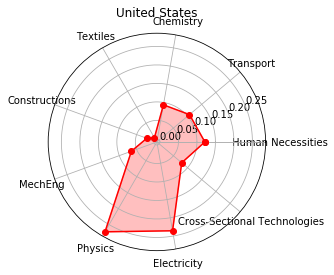

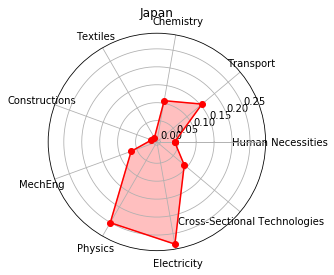

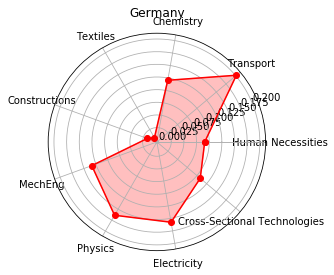

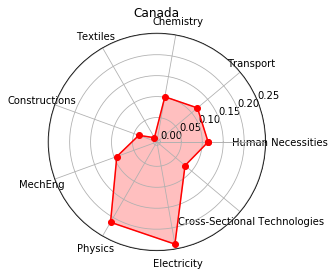

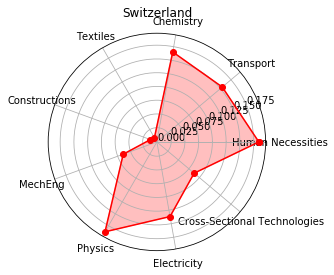

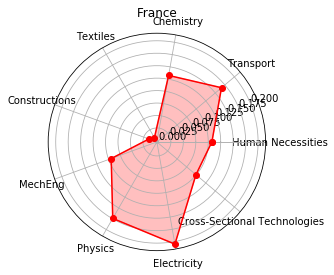

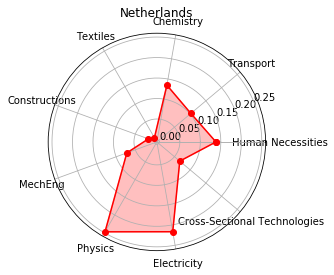

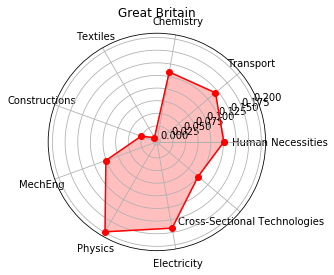

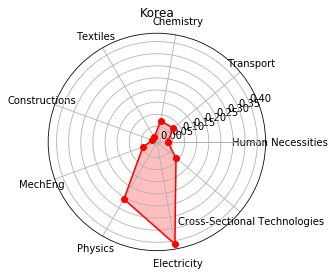

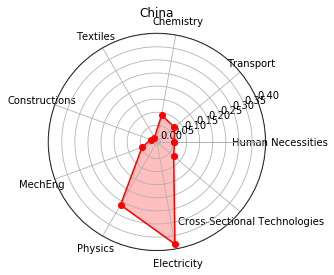

In [47]:
model_countries = [('US', 'United States'),('JP', 'Japan'), ('DE','Germany'), ('CA','Canada'),\
                   ('CH', 'Switzerland'), ('FR','France'), ('NL','Netherlands'), \
                   ('GB','Great Britain'), ('KR', 'Korea'), ('CN', 'China')]
    
model = sortby('A').head(15)
model = model.apply(lambda x: x/sum(x), axis=1) # Normalizing the number of patents per sector to extract percentage rates(%)

for i in range(len(model_countries)):
    spider_chart(model, model_countries[i][0], title= model_countries[i][1])

We can see that Japan, Korea, China, Great Britain France and the United States hold most of their patents in the Electricity and the Physics sectors. Switzerland's patents are more concentrated on Chemistry, Humans Necessities and Physics. Germany, Switzerland and Great Britain hold significant number of patents in Transport. 

In overall, Germany, Switzerland and Great Britain are the most polyvalent countries in terms of granted patent classifications, as we can see that they have the most diversified patents across the different sectors.

# 2. Sector-Specific Analysis of Granted Patents

This last part aims to study the evolution of granted patents per sector of interest (Energy, Fintech and AI).

To retreive the patents from the PatentsView database, keywords and IPC symbols are used. IPC symbols allows to classify patents from different sector. E.g. F01B 3 (F = Mechanical engineering, lighting, heating, weapon, 01 = Machines or engines in general, B = Steam engines, 3 = Reciprocating-pison machines or engines with cylinder axes). Keywords allows us to confirm that the patent technology from IPC correspond exactly to what we are looking for.

In order to help ourselves find the IPC symbols corresponds to which sector, the website http://www.wipo.int/classifications/ipc/en/ is used. A research can be carried out by keywords and then every IPC symbol is checked separately to confirm the match with our sector criterion.

## 2.1. Energy

The patents application for the energy sector will be studied in this section. 3 different categories will be compared: **Renewable energy, coal and gas, nuclear energy**. Inside the renewable category, many subcategories will be studied : Solar photovoltaic, solar thermic, wind, hydro, wave and tidal, carbon capture and storage. The research was made from 2006 to 2016

First a comparison of the number and growth of patents over time is carried out. Then the correlation between the growth in the sectors will be highlighted. A visual map of the distribution of number of patent will be displayed. The last next step includes the study of the number of patents for every sector by country and companies. This shades the light on the potential of a technnology in a country and which companies perform the best for a particular sector.

The keywords used for the renewable energy technology are given in the *paper* **"Patent-based Technology report - Alternative Energy Technology"** made by the **"World Intellectual Property Organization"**, which gives a fairly accurate result. For the nuclear/coal and gas sector, the website http://www.wipo.int/classifications/ipc/en/ is used. For the latter, keywords are researched and every potential IPC symbols are studied separately to find a match in the category. 

The research is carried out from 2007 to 2016. The code below contains all the keywords and symbols for the categories
A match is accepted if 2 conditions are fulfilled :
    - The IPC symbol is in the list
    - Every keywords of the sublists are contained in the title of the patent

In [ ]:
years=range(2007,2017)
list_ipc_solar_p=[('E','04','13'),('H','01','25'),('H','01','31'),('H','02','6')]

keywords_solar_power= [["solar", "cell"], ["solarcell"],["solar-cell"],["photovoltaic"], ["solar", "light"], 
                       ["solar", "panel"],["solar", "module"],["photo", "light"],["photo", "cell"],
                       ["photo", "panel"],["photo", "module"],["PV", "light"], ["PV", "cell"],
                       ["PV", "panel"],["PV", "module"],["sun", "light"],["sun", "cell"],
                       ["sun", "panel"],["sun", "module"]] 


keywords_solar_thermal=[['CSP'],['concentrat'],['trough'],['dish'],['tower'],['sterling'],
                        ['stirling'],['solar','heat'],['solar','thermal'],['solar','accumulate'],
                        ['solar', 'boiler'],['solar','house'],['solar','hot'],['solar','building'],
                        ['solar','system'],['solar', 'boiling'],['sun','heat'],['sun','thermal'],
                        ['sun','accumulate'],['sun', 'boiler'],['sun','house'],['sun','hot'],
                        ['sun','building'],['sun','system'],['sun', 'boiling']]

keywords_wind=['wind','turbine']

keywords_hydro = [['hydropower'], ['hydroelectric'], ['hydro-electr'], ['hydro-power'], 
                  ['water-power'],['waterpower'], ['flow'], ['fluid'], ['fluidpressure'], 
                  ['dam'], ['hydro'],['water'], ['river'], ['drainag'],  ['hydraulic'], 
                  ['buoyancy'], ['tunnel','pump'],['pelton','turbine'], ['turgo','turbine'], 
                  ['ossberger','turbine'], ['fransis','turbine'],['kaplan','turbine'],
                  ['tubular','turbine'], ['bulb rim','turbine']]

keywords_wave_and_tidal = [['tidal'], ['tide'], ['seawater'], ['sea','water'], 
                           ['ocean'],['wave'], ['bollow'], ['offshore'], ['onshore'], 
                           ['duck'], ['float'],]

keywords_carbon_capture_and_storage = [['carbon','dioxide','storage'], ['carbon','dioxide','capture'], 
                ['carbon','dioxide','recover'],['carbon','dioxide','deliver'],['carbon','dioxide','regenerat'], 
                ['co2','storage'], ['co2','captur'], ['co2','recover'],['co2','deliver'],['co2','regenerat'],
                ['carbon','gas','storage'], ['carbon','gas','captur'], 
                ['carbon','gas','recover'],['carbon','gas','deliver'],['carbon','gas','regenerat']]

keywords_coal_and_gas=[['gas'],['carbon'],['monoxide'],['steam','engine'],['steam','generation'],
                       ['steam','machine'],['combustion'],['burner'],['furnace'],['coal']]

keywords_nuclear = [['control','nuclear'],['nuclear','reaction'],['nuclear','plant'],
                   ['nuclear','reactor'],['nuclear','explosion'],['magnetic','resonance'],
                   ['plasma'],['fission'],['particule'],['fusion']]

list_ipc_solar_t=[('F','03','6'),('G','02','5'),('H','01','31'),('C','02','1'),
                  ('E','04','13'),('F','02','1'),('F','22','1'),('F','24','9'),('F','24','1'),
                  ('F','24','2'),('F','24','3'),('F','25','27'),('F','26','3'),('H','02','6')]

list_ipc_wind=[('F','03','1'),('F','03','3'),('F','03','5'),('F','03','7'),('F','03','8'),
               ('F','03','9'),('F','03','13'),('F','03','15'),('F','03','17'),('F','03','80'),
               ('B','60','8')]

list_ipc_hydro=[('E','02','9'),('F','03','1'),('F','03','3'),('F','03','7'),('F','03','13'),
               ('F','03','15'),('F','03','17'),('F','16','41'),('H','02','57')]

list_ipc_wave_and_tidal=[('E','02','9'),('F','03','7'),('F','03','13'),
               ('F','03','15'),('F','03','17')]

list_ipc_carbon_capture_and_storage=[('B','63','35'),('C','01','3'),('C','01','31'),
               ('C','02','1'),('C','07','7'),('F','01','3'),('F','25','3'),('B','01','20'),
               ('B','01','53'),('B','01','11')]

list_ipc_carbon_coal_and_gas=[('C','10','1'),('C','10','3'),('F','01','1'),
               ('F','01','2'),('F','01','5'),('F','01','7'),('F','01','9'),('F','01','11'),
               ('F','01','17'),('F','22','5'),('F','22','7'),('F','22','9'),
               ('F','23','10'),('F','23','20'),('F','23','30'),('F','23','40'),('F','23','50'),
               ('F','23','60'),('F','23','80'),('F','23','1'),('F','23','3'),('F','23','5'),
               ('F','23','7'),('F','23','9')]

list_ipc_nuclear=[('G','21','1'),('G','21','3'),('G','21','5'),
               ('G','21','7'),('G','21','17'),('G','21','19'),('G','01','24'),('H','05','6')]

#### Research in the database

Below, the number of patents for every sector is retreived. The function **get_nb_patent_years_keyword** takes a list of years of interest, the keywords and the IPC symbols. The USPTO API is used to obtain the informations.

In [ ]:
list_nb_patent_solar_p, _= get_nb_patent_years_keyword(years,keywords_solar_power,list_ipc_solar_p)
list_nb_patent_solar_t, _ = get_nb_patent_years_keyword(years, keywords_solar_thermal, list_ipc_solar_t)
list_nb_patent_wind, _ = get_nb_patent_years_keyword(years,keywords_wind,list_ipc_wind)
list_nb_patent_hydro, _ = get_nb_patent_years_keyword(years,keywords_hydro,list_ipc_hydro)
list_nb_patent_wave_tidal, _ = get_nb_patent_years_keyword(years,keywords_wave_and_tidal, list_ipc_wave_and_tidal)
list_nb_patent_carbon_capture_and_storage, _= get_nb_patent_years_keyword(years, 
                keywords_carbon_capture_and_storage, list_ipc_carbon_capture_and_storage)
list_nb_patent_coal_and_gas, _ = get_nb_patent_years_keyword(years,
                    keywords_coal_and_gas, list_ipc_carbon_coal_and_gas)
list_nb_patent_nuclear, _ = get_nb_patent_years_keyword(years,
                    keywords_nuclear, list_ipc_nuclear)

Then a single dataframe is created with all the informations.

In [ ]:
dfEvolutionPatent=pd.DataFrame(columns=['solar photo','solar therm','wind','hydro',
                        'tidal and wave','carbon capture','coal and gas','nuclear energy'])
dfEvolutionPatent=dfEvolutionPatent.reindex(list(years))
dfEvolutionPatent['solar photo']=list_nb_patent_solar_p
dfEvolutionPatent['solar therm']=list_nb_patent_solar_t
dfEvolutionPatent['wind']=list_nb_patent_wind
dfEvolutionPatent['hydro']=list_nb_patent_hydro
dfEvolutionPatent['tidal and wave']=list_nb_patent_wave_tidal
dfEvolutionPatent['carbon capture']=list_nb_patent_carbon_capture_and_storage
dfEvolutionPatent['coal and gas']=list_nb_patent_coal_and_gas
dfEvolutionPatent['nuclear energy']=list_nb_patent_nuclear

The dataframe is saved in an excel file for further use. This avoid performing the request on the USPTO website every time, which costs pretty expensively in terms of time and complexity.

In [ ]:
savedfexcel(dfEvolutionPatent,'evolution_nb_patents')

Here we add a column containing the number of patents for renewable energy and display the table containing the number of patents.

In [ ]:
dfNbPatent=pd.read_excel('evolution_nb_patents.xlsx')

dfNbPatent['renewable']=dfNbPatent[['solar photo','solar therm','wind','hydro','tidal and wave',
                                   'carbon capture']].sum(axis=1)
dfNbPatent

#### Evolution of number of patents for every energy sectors

Display the plots of the evolution of number of patents for every category

In [ ]:
plt_nb_patent(years,dfNbPatent['solar photo'],'years','nb patents','nb patents solar photovoltaic')
plt.figure()

In [ ]:
plt_nb_patent(years,dfNbPatent['solar therm'],'years','nb patents','nb patents solar thermic')
plt.figure()

Even if the photovoltaic technology is more important than the solar thermic technology in terms of number of patents, both sectors had a huge increase, especially in the past 4 years

In [ ]:
plt_nb_patent(years,dfNbPatent['wind'],'years','nb patents','nb patents wind')
plt.figure()

Wind energy has more patents than solar energy in 2007/2008. However if we sum up both solar technologies, in 2016 wind and solar energy have a similar number of patents.

In [ ]:
plt_nb_patent(years,dfNbPatent['hydro'],'years','nb patents','nb patents hydro')
plt.figure()

Hydro does not have a large number of patent. Howerver, we could expect that this technology is outdated since dams were built many years ago (at least in Switzerland). In fact, as the other energy sectors and the number of patent in general, hydroelectric technology also evolved fast in the past.

In [ ]:
plt_nb_patent(years,dfNbPatent['tidal and wave'],'years','nb patents','nb patents wave and tidal')
plt.figure()

As we can observe, wave and tidal turbines were irrelevant in 2007. In the next years this technology became more important and the number of patent became hundred times greater in 10 years.

In [ ]:
plt_nb_patent(years,dfNbPatent['carbon capture'],'years','nb patents', 'nb patents carbon capture')
plt.figure()

Carbon capture almost didn't exist in 2007 but increased greatly in the past years although the number of patents is very volatile

In [ ]:
plt_nb_patent(years,dfNbPatent['coal and gas'],'years','nb patents','nb patents coal and gas')
plt.figure()

As the other sector, fossil energy had an increase in research from 2013 to 2015. However, it decreases in 2016. We can expect the trend to contimue in that direction.

In [ ]:
plt_nb_patent(years,dfNbPatent['renewable'],'years','nb patents','nb patents renewable energy')
plt.figure()

The plot above represents the sum of the number of patents in all the renewable energy sector

In [ ]:
plt_nb_patent(years,dfNbPatent['nuclear energy'],'years','nb patents','nb patents nuclear')

The number of patents for nuclear energy also blew up in from 2013 to 2016

#### Renewable vs Fossil energy

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(years, dfNbPatent['coal and gas'],'r', label='coal and gas')
ax.plot(years, dfNbPatent['renewable'],'g', label= 'renewable')
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.legend()
plt.title("Renewable vs coal and gas")

The plot above shows clearly that there was the same number of patent between fossil energy and renewable around 2007 and 2009. After 2009 it can be note that the patent applications for renewable energy evolved much faster. In 2016, the number of patent in coal and gas decreased, we can then expect that the difference between both categories will increase even faster in the future.

#### Comparisons of growth

The evolution of granted patent in energy can be compared between each other for the past 10 years. In order to achieve this pupose, we can compute the growth of patents at year **t** according to the folowing formula :

\begin{equation*}
Growth (t) = \frac{nb\ patents\ year\ (t+1)\ -\ nb\ patents\ year\ (t)}{nb\ patent\ year\ (t)}
\end{equation*}

Create a dataframe containing the growth of every categories. the function get grows return a list of growth according to the number of patent and the years

In [ ]:
energies = ['solar photo','solar therm','wind','hydro', 'tidal and wave','carbon capture','coal and gas','nuclear energy','renewable']

dfEnergyPatentGrowth=pd.DataFrame(columns=['solar photo','solar therm','wind','hydro',
                        'tidal and wave','carbon capture','coal and gas','nuclear energy','renewable'])

for energy in energies:
    dfEnergyPatentGrowth[energy] = get_growth(years,list(dfNbPatent[energy]))

Below, the plot showing the average growth in patent application is displayed. The black straight represents the standard deviation

In [ ]:
sns.barplot(data=dfEnergyPatentGrowth)
plt.xticks(rotation=45)

The bar plot above highlights the fact that solar energy is a trend nowadays. Carbon capture is a very new technology that is espected to evolve very fast in the future. However, as we can see in the table containing the number of patent, this sector do not contain many patents and the standard deviation is large. Therefore the future of this technology is **uncertain**. 

By looking at the 3 average growth on the right, it can be observed that renewable energy has evolved more in the past than fossil energy. Despite the **nuclear catastrophe in Fukushima**, the number of patents in that sector still exploded and evolved faster espessially in the past few years. However, the number of patents in renewable and fossil energy is much larger. It is also important to note that the patents in nuclear energy might also include the research in making this technology safer.

#### Correlation matrix

In [ ]:
dfEnergyPatentGrowth.corr()

With a correlation matrix, relations between the sector can be highlighted. 

First, we can observe that the technology in solar termic and photovoltaic evolve together. Wind and Hydro technologies seens to be highly correlated. We could suppose that those technology are complementary and that governements encorage investments in both technologies at the same time. 
Tidal and wave as well as carbon capture are not correlated to any other energy secors. It can be explained that those technologies are new compare to the others. It is interesting to note that carbon and gas technologies have high correlation with nuclear energy. If some countries are not focused on green energy, the investment in these 2 sectors will be fostered. 

*With a correlation of 0.97 between the wind energy and renewable energy in general, it can be deduced that wind energy represent the general trend in green energy.*

#### Comparisons of renewable energy patents between companies and countries

For this next study, we will only retrieve the patents from 2010 to 2016. It takes less compilation time and shows without loss of generality a sufficient amount of data for companies and countries.

In [ ]:
years=list(range(2010,2017))

Create dataframes containing all the information of companies and countries for every years and every sectors of interest. The function **get_df_patent_years_keyword** researches all these data by using the API of PatentsView.

In [ ]:
dfPatentSolarPhoto = build_dataframe(years,keywords_solar_power,list_ipc_solar_p)
dfPatentSolarThermo = build_dataframe(years,keywords_solar_thermal,list_ipc_solar_t)                                   
dfPatentWind = build_dataframe(years,keywords_wind,list_ipc_wind)  
dfPatentHydro = build_dataframe(years,keywords_hydro,list_ipc_hydro)  
dfPatentWaveTidal = build_dataframe(years,keywords_wave_and_tidal,list_ipc_wave_and_tidal)  
dfPatentCarbonStorage = build_dataframe(years,keywords_carbon_capture_and_storage,list_ipc_carbon_capture_and_storage)  

Create the dataframe containing all the renewable energy patents

In [ ]:
dfPatentRenewable=pd.concat([dfPatentSolarPhoto,dfPatentSolarThermo,dfPatentWind,
                   dfPatentHydro,dfPatentWaveTidal,dfPatentCarbonStorage], ignore_index=True)

Save all the informations in an excel file to avoid to research again in the database. The only pupose is to save time during the developpement of the code

In [ ]:
# save individual dataframes
savedfexcel(dfPatentSolarPhoto, 'patent_solar_photo')
savedfexcel(dfPatentSolarThermo, 'patent_solar_thermo')
savedfexcel(dfPatentWind, 'patent_wind')
savedfexcel(dfPatentHydro, 'patent_hydro')
savedfexcel(dfPatentWaveTidal, 'patent_wave_tidal')
savedfexcel(dfPatentCarbonStorage, 'patent_carbon_storage')
# save the merged dataframe
savedfexcel(dfPatentRenewable,'patent_renewable')

Read the excel files

In [ ]:
# read
dfPatentSolarPhoto = pd.read_excel('patent_solar_photo.xlsx')
dfPatentSolarThermo = pd.read_excel('patent_solar_thermo.xlsx')
dfPatentWind = pd.read_excel('patent_wind.xlsx')
dfPatentHydro = pd.read_excel('patent_hydro.xlsx')
dfPatentWaveTidal = pd.read_excel('patent_wave_tidal.xlsx')
dfPatentCarbonStorage = pd.read_excel('patent_carbon_storage.xlsx')
dfPatentRenewable = pd.read_excel('patent_renewable.xlsx')

#### Map for renewable energy

A map showing the number of patents for renewable energy is created. As it was coded before, a log scale is used for the color to be more visuable. Indeed, the number of patents is much larger in the US than other countries.

Below the dataframe is cleaned by the function **df_get_nb_by_group_and_clean**. This function take as paramenter a dataframe with all the patents and a column for the year, country and company. The second parameter is *inventor_country* or *assignee_organisation* depending on wether we want to classify by country or company. The last paramenter is True if we want to include a column 'total' which is the sum of umber of patents for a company or country for every year. The function returns the companies or countries classified from the biggest to the smallest patent provider. Each column contains the number of patents for each years.

In [ ]:
# max_n is the maximum number of patents holder, which is the US
dfPatentRenewableMap = df_get_nb_by_group_and_clean(dfPatentRenewable,'inventor_country', years, True)
max_n = dfPatentRenewableMap['total'].max()
#Here, we set up a Colormap using the logarithmic scale as shades of Blue colors that will be used to color the map
colormap = cm.linear.PuBu.scale(0, round(math.log(max_n))).to_step(100)
#Take the log of the number of granted patents to match the logarithmic scale
log_nb = list(map(lambda x: math.log(x) if (x > 0) else 0 , dfPatentRenewableMap['total']))
#In the below DataFrame, each country has now its 'logarithmic color code'
dfPatentRenewableMap['log_color_code'] = log_nb
#We need also to convert the table into a dictionnary, in order to map a feature to its number of patents.
patents_dict = dfPatentRenewableMap['log_color_code']
#Here we map each country to a color according to the "logarithmic" number of patents
color_dict = {key: colormap(patents_dict[key]) for key in patents_dict.keys()}

The map is created using the same method as the total number of patents. The same world geojson file is used. At the end, the map is saved in a HTML file.

In [ ]:
m = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=2)  

#Load the world map
countries_geo_path = './data/custom.geo.json'
geo_json_data = json.load(open(countries_geo_path))

#Apply the colors using our defined function ret_color, desribed above
folium.GeoJson(geo_json_data,
               style_function=lambda feature: {
              'fillColor': ret_color(feature, color_dict),
              'weight': .5,
              'fillOpacity': 0.8
               }).add_to(m)

#Setting up the scale 
colormap = cm.linear.PuBu.scale(0, max_n).to_step(50)
colormap.caption = 'Number of patents'
m.add_child(colormap)

m.save('data/patentsrenewable.html')

Here is an overview of the distribution of renewable energy granted patents over the world 

**The interactive map can be accessed [here](https://skagankose.github.io/ada_fall_2017/html/patentsrenewable.html).**

![Image](data/renewable_energy_patents.png)

#### Interactive barplot by country
The function interact from ipywidgets library allows to create a scroll bar and trigger different event according to the selection. When a sector is selected, the function plt_interactive_by_country is called. This function must take one parameter which is the list of the sectors. Then, according to the technology selected, the related barblot is displayed

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

interact(plt_interactive_by_country, sector=['solar photo','solar termal','wind','hydro','tidal and wave',
                                        'carbon capture','renewable'])

Because Jupyter notebook do not show the interactive barplot, the cell below can be compile to display all of them

In [ ]:
plot_by_country('inventor_country')

All technologies are dominated by the US, especially for solar thermic, hydro, tidal and wave. This is not surprising since USPTO is a US company.

**Solar Photovoltaic**: Japan, Korea and Taiwan follows the US in the ranking, we can note that their investment in this sector highly increased in the past 3 years. Germany, France and China arrive after in the ranking

**Solar Themic**: US and Japan are the first for this technolog. However, Germany and Spain are 3rd and 4th with a big investment in that sector in 2015.

**Wind**: Germany outperforms Japan in that sector and take the second rank. We can also note the big effort of Denmark in that area which take the 4th rank. The politic of developping wind energy in those 2 countries explains this good performance

**Hydro** is highly dominated by the US followed by Japan and Germany. Canada is ranked 4th with 62% of its energy produce by hydroelectricity.

**Tidal and Wave**: Highliy dominated by the US. The UK becomes second with a high investment in 2014. We can notice that European countries like France, Spain, Italy, Norway and Finland are also investing in this technology, especially the past few years.

**Carbon Capture**: Japan and Korea are at the forefront of the research for this technology after the US and invested a lot during 2016 which is auspicious for the future.

***Renewable energy in general***: The ranking follows the general trend of all the specific renewable energy with the US fist, followed by Japan, Germany, Korea and Denmark. We can note that China which is a big country is only 9th and Russie do not even appear in the top 10.

In [ ]:
interact(plt_interactive_by_company, sector=['solar photo','solar termal','wind','hydro','tidal and wave',
                                        'carbon capture','renewable'])

Same as before, the cell below can be compile to display all the companies plots by sectors

In [ ]:
plot_by_country('assignee_organization')

Different companies are leaders for different sectors:

**Solar Photovolataic**: SunPower Corporation is first, it is a solar panel supplier based in San Jose, CA and is a subsidiary from Total. This company is known for their highly performant solar panel. Then comes the multinational US company IBM  and the Japanese company Sharp.

**Solar Thermic**: SunPower Corporation is also first for the thermic solar panel followed closely by Abengoa which is a spanish company. It confirms that Spain arrives 4th in the ranking for solar termic panels.

**Wind**: The multinational US company GE activ in many energy sector is the first patent company for wind. Vestas which is a danish company is 3nd. The latter is only active in wind energy and is highly responsible for the good ranking for Denmark in that area.

**Hydro**: Caterpilar dominate the market in terms of Hydro patents. Even if their main area is construction machine, they also profide equipments for hydropower plants.

**Tidal and Wave**: The market is shared by many companies in that sector and we can note that none of them are multinational but specialisez in that sector. Many of them started their invesments in 2015/2016. Therefore we can conclude that this area has a big potential. The first company (Ocean Power technology) is from the US, the second (Voith) is from Germany and the third is the National Taiwan University.

**Carbon Capture** is dominated by Samsung. We can note that they provided most of the patents in the past 2 years (2015/2016). Therefore we can conclude that they are inversting a lot in that technology and are expected to grow even more in that sector. The same conclusion can be drawn for the japanese company Toshiba who started to invest in Carbon Capture in 2014.

## 2.2. FinTech

We will now talk about the patents related to FinTech (financial technology).
First, let us introduce some keywords and IPCs that will allow us to search for these specific patents.

In [ ]:
years = range(1976,2017)

ipc_fintech=[('G','06','30'),('G','06','-'), ('G', '06', '40'), ('H', '01', '21')]

keywords_fintech = [["cryptocurrency"], ["crypto","currency"],["crypto-currency"],["blockchain"], ["bitcoin"], 
                       ["distributed", "ledger"],["fintech"],["financial", "technology"],
                       ["virtual", "currency"],["virtual", "currencies"],["digital", "currency"], ["digital", "currencies"],
                       ["smart", "contracts"],["smart", "contract"], ["FinTech"], ['fintech'], ['financial'], ['financial','data'],
                       ['trading'], ['transaction'], ['transactions']]

The function **get_nb_patent_years_keyword** is similar to **get_nb_patents_year**, but filters the patents additionnaly by **IPC (International Patent Classification)**, which is a hierarchical classification system that classifies the patents into sections and classes. We are now able to look for the FinTech related keywords using our function.

In [ ]:
fintech_number, fin_patents = get_nb_patent_years_keyword(years, keywords_fintech, ipc_fintech)

We are now able to plot the number of FinTech patents by year and visualize the growth. 

In [ ]:
plt_nb_patent(years,fintech_number,'Years','Number of patents','Number of FinTech patents')
plt.figure()
plt.show()

We can see here that FinTech patents popped out recently in 2004 and went exponentially high to reach a peak of 709 patents in 2013.

Notice here that the number of patents almost doubled between 2009 and 2010 right after the introduction of Bitcoin, which was the start of a patent technology race for the cryptocurrency companies.

We will now perform some cleaning to our patents DataFrame. We extract the full names of the inventors by joining the first and last names, then we rename the columns.

In [ ]:
fin = fin_patents.copy()
inventor_id_name = dict()
# Extracting the inventors first and last name
for row in fin["inventors"]:
    inventor_id = row[0]["inventor_id"]
    inventor_name = str(row[0]["inventor_first_name"]) + " " + str(row[0]["inventor_last_name"])
    inventor_id_name[inventor_id] = inventor_name

In [ ]:
# Renaming the columns and formatting the date
fin.rename(columns={'patent_num_cited_by_us_patents': 'cited_by_others',}, inplace=True) 
fin["country"] = fin["assignees"].apply(lambda row: row[0]["assignee_country"])
fin["organization"] = fin["assignees"].apply(lambda row: row[0]["assignee_organization"])
fin["inventor_id"] = fin["inventors"].apply(lambda row: row[0]["inventor_id"])
fin["inventor_name"] = fin["inventor_id"].apply(lambda row: inventor_id_name[row])
fin["year"] = fin["patent_date"].apply(lambda row: int(row.split("-")[0]))
fin["month"] = fin["patent_date"].apply(lambda row: int(row.split("-")[1]))
fin["cited_by_others"] = fin["cited_by_others"].astype("int64")
fin.index = fin.patent_number

In [ ]:
# Keep only the columns we're interested in
fin = fin.drop(axis = 1, labels=['IPCs','assignees', 'patent_date', 'patent_number', 'inventors', 'month'])

Here is what the result look like:

In [ ]:
fin.head(3)

Among those patents, we chose to display the 5 most cited ones, hence the most popular.

In [ ]:
top_patents = fin.sort_values(by='cited_by_others', ascending=False)
top_patents = top_patents[["patent_title","cited_by_others", "year", "organization",\
                           "inventor_name", "country"]]

with pd.option_context('display.max_colwidth', -1):
    display(top_patents.head(5))

Now, let us see who are the world first leaders among the FinTech patents inventors.

In [ ]:
fin[["patent_title","inventor_id"]].rename(columns={'patent_title': 'patent_count',}, inplace=True)
fin["patent_count"] = 1
top_inventors = fin.groupby(['inventor_id']).sum().sort_values(by='patent_count', ascending=False)
        
top_inventors["inventor_name"] = top_inventors.index
top_inventors["inventor_name"] = top_inventors["inventor_name"].apply(lambda row: inventor_id_name[row])
top_inventors.head(10).plot.barh(x='inventor_name', y='patent_count', figsize=(17,10), fontsize=20, grid=True).invert_yaxis()

Funny story here is that **Robert A. West** holds the most patents in FinTech, what are the odds! After some googling it turned out that he was not our professor at all. As a matter of fact, Robert A. West is a intellectual property (IP) specialist who devoted his life to the creative process, and filing a large number of patents, 67 of which are FinTech related.

In [ ]:
top_inventors.head(10)

As an example, here is one of his patents in FinTech:

In [ ]:
list(fin[fin['inventor_name'] == 'Robert A. West'].patent_title)[0]

Let us now know more about who issues the most FinTech patents among the firms worldwide. 

In [ ]:
fin_org = fin.copy()
fin_org = fin_org[["patent_title","organization"]].rename(columns={'patent_title': 'patent_count',})
fin_org["patent_count"] = 1
top_organizations = fin_org.groupby(['organization']).sum().sort_values(by='patent_count', ascending=False)
top_organizations["organization"] = top_organizations.index
top_organizations.index = range(1,len(top_organizations)+1)

In [ ]:
top_organizations.head(25).plot.barh(x ='organization', y= 'patent_count',figsize=(17,15),\
                                     fontsize=20, grid= True).invert_yaxis()

Trading Technologies International Inc. is a Chicago based company that develops and delivers professional trading software platforms for trading around the world. It takes the lead of FinTech patents by issuing about 350 patents so far. Among the known companies, American Express ranks 3rd, eBay 5th, IBM 6th and VISA 11th.

Let us now talk more about the firms who issue the blockchain patents.
For this need we scrapped the Clarivate Analytics database, which is an independent company that owns and operates a collection of patents, seeking the first world issuers of blockchain patents. We came up with the following firms:

In [ ]:
#From Clarivate Analytics 
blockchain = pd.read_csv('./data/blockchain.csv')
blockchain.index = range(1, len(blockchain)+1)
blockchain

Security First Corp. takes over the blockchain patent field (64). The interesting part here is that IT, Semiconductor and Telecommunication companies are also involved in the blockchain patents, even though it’s not particularly their chosen field. 

Let us draw a bar chart for a better visualization:

In [ ]:
blockchain.sort_values(by='Blockchain patents', ascending = True).head(20).plot.barh(x='Company', y='Blockchain patents', figsize=(17,10), fontsize=20, grid=True)
plt.show()

We can identify some famous firms such as Microsoft who ranks 2nd, IBM 3rd, MasterCard 6th and Google 10th.

We will now classify all the FinTech patents by country and try to give an overview on the world distribution of the FinTech patents.

In [ ]:
# Dictionary for to store the countries with their respective number of Fintech patents
fin_patent_by_country = dict()
for country in fin.country.unique():
    fin_patent_by_country[country] = dict()
    for i in range(2018-1976):
        year = 1976+i
        if year != 2005 and year != 2017:
            fin_patent_by_country[country][year] = int()

# Perform the count
for country, year in zip(fin["country"], fin["year"]):
    if year != 2005 and year != 2017:
        fin_patent_by_country[country][year] += 1

# Clean the dictionary
del fin_patent_by_country[None]
del fin_patent_by_country["City of\""]

In [ ]:
# Build a dataframe from the dictionary and a flip the axes
country_year_df =\
pd.DataFrame([(country,year,value) for country,v in fin_patent_by_country.items() for year,value in v.items()],\
             columns = ['country','year','patent_num'])
country_year_df = country_year_df.pivot(index='country', columns='year', values='patent_num')
country_num = pd.DataFrame(country_year_df_copy["total"])

**country_year_df** is a dataframe that contains countries in rows, and years in columns from 1976 to 2016, and each entry represents the number of FinTech patents for a given country at a given year.

Here below we sum up each row to retrieve the cumulative number of patents since 1976.

In [ ]:
country_year_df_copy = country_year_df.copy()
country_year_df_copy['total'] = country_year_df_copy.apply(sum, axis=1)
clean_df = country_year_df_copy.sort_values(by='total', ascending=False).drop('total',axis=1)

Let's now draw a world map to visualize the world distribution of the FinTech patents:

In [ ]:
# Define a colormap and max_count for the map legend
max_count = country_num['total'].max()
colormap = cm.linear.PuBu.scale(0, round(math.log(max_count)))
log_total = list(map(lambda x: math.exp(math.log(x)) if (x > 0) else 0 , country_num['total']))
country_num['log_total'] = log_total

In [ ]:
# Helper function to map colors to the countries
def get_color(feature, colors):
    if (feature['properties']['iso_a2'] in colors.keys()):
        return colors[feature['properties']['iso_a2']]
    else:
        return '#ffffff' 

In [ ]:
#We need also to convert the table into a dictionnary, in order to map a feature to its number of patents.
patents_dict = country_num.drop(axis = 1, labels=['total'])

#In the DataFrame, each country has now its own "color code"
patents_dict = patents_dict["log_total"]

#Here we map each country to a color according to the number of patents
color_dict = {key: colormap(patents_dict[key]) for key in patents_dict.keys()}

In [ ]:
m = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=2)  

#Load the world map
countries_geo_path = 'data/custom.geo.json'
geo_json_data = json.load(open(countries_geo_path))


#Apply the colors using our defined function ret_color, desribed above
folium.GeoJson(geo_json_data,
               style_function=lambda feature: {
              'fillColor': get_color(feature, color_dict),
              'weight': .5,
              'fillOpacity': 0.8
               }).add_to(m)

#Setting up the scale 
colormap = cm.linear.PuBu.scale(0, max_count).to_step(50)
colormap.caption = 'Number of FinTech Patents'
m.add_child(colormap)

#Save to HTML map
m.save('data/fintech_world.html')

Here is an overview of the distribution of FinTech granted patents over the world 

**The interactive map can be accessed [here](https://skagankose.github.io/ada_fall_2017/html/fintech_world.html).**

![Image](data/fintech_world.png)

We can easily spot the countries that has most FinTech patents, among them the USA, Canada, Japan, Australia, Germany, Sweden, Germany, and guess what...**Switzerland!**

Let us now talk about a specific technology of FinTech which is e-banking, a method of banking in which the customer conducts transactions electronically via the Internet.

For this task, we scrapped **Google Patents** to retrieve the e-banking related patents.

In [ ]:
# Google Patents
e_banking = pd.read_csv('./data/e-banking.csv', encoding = "ISO-8859-1").dropna()
e_banking.set_index(pd.Series(range(1, len(e_banking) + 1)), inplace=True)
# Cleaning
clean_e_banking = e_banking.drop(\
            labels=['id', 'priority date', 'filing/creation date', 'publication date', 'result link'], axis=1)

Here is a small overview on the e-banking dataFrame.

In [ ]:
clean_e_banking.head()

If we sort these patents by company, we can rank them by assignee (company).

Here is the top 20 of the world issuers of e-banking related patents.

In [ ]:
clean_e_banking['Number of e-Banking patents'] = 1
clean_e_banking.groupby('assignee').sum().sort_values(by= 'Number of e-Banking patents', ascending=False).head(20)

**Citibank** takes the lead in e-banking with 14 patents. 

In 2015, Citibank was the first firm to introduce the **Passwordless Security**. As a matter of fact, the bank was granted a patent for a system allowing users to log into an online account via a trusted device (computer, smartphone, tablet, etc.). 

**Diebold** who ranks 2nd, is an American financial self-service, security and services corporation internationally engaged primarily in the sale, manufacture, installation and service of self-service transaction systems such as ATMs.

We will now sort the e-banking patents by year to see how they evolved

In [ ]:
clean_e_banking['grant date'] = clean_e_banking['grant date'].\
        apply(lambda x: ("19" + x.split('/')[2]) if (int(x.split('/')[2]) > 50) else ("20" + x.split('/')[2]))
top_e_banking = clean_e_banking.groupby('grant date').sum().sort_index()
plot_e = top_e_banking.loc['2000':]
plot_e.plot(y = 'Number of e-Banking patents', figsize=(17,5), grid=True, kind='area')

From the above plot, we can see that from 2004 to 2006, there has been a lot considerably important interested in the e-banking. During this period, a lot of banks around the worlds developped their e-banking platforms, in particular mobile bankings apps, which explains the increase in the patents. Afterwards when e-banking became mainstream and well developped, we can observe a decrease in the number of patents, which reflects that once e-banking was implemented by almost every bank, there was no additional need to issue more of these patents. Notice once again, that from 2009 there was a significantly decrease of patents when the blockchain technology was born and took over all the FinTech patents. 

## 2.3. Artificial Intelligence

Question to Answer in this section as folows:

**1.** Which are the most cited patents (by other US patents), within the field of AI?

**2.** How much AI related patents granted throughout the years and what is the percentage? We know that from common knowledge that AI related researches increased and decreased again during past decades, can we observe a pattern by analysing the number of patents granted over the years (in 1900s)? AI is also, one of the most popular areas of research in today's world. Will these popularity will fade away as it did in the past or will it persist this time? 

**3.** Who are the most prolific inventors?

**4.** Which companies are holding most AI patents? 

**5.** Which countries have the most patents related to artificial intelligence? 

**6.** Is there a relationship between investing in AI researches and being among the top companies (according to  Fortune 500 ranking)? 

**7.** Russian President Vladimir Puting recently stated that *“the nation that leads in AI will be the ruler of the world”*. Considering that, is the relationship between the number of AI related patents that a country holds and the rank of its defense industry *(according to Defense News 100 List)*?

First, we gathered all the patents related to AI.

Keywords related to Artificial Intelligence have been gathered from different sources and can be accessed from [here](data/ai_keywords.txt). We consider a patent related to AI if its description contains one of these keywords.

In [ ]:
keywords = set()

f = open("data/ai_keywords.txt")
for line in f.readlines():
    keywords.add(line.strip('\n'))

Initialize two dictionaries, one for counting the total number patents and one for keeping track of the actual informations of AI related patents. We are going to use total number of patents to calculate the percentage of AI related patents throughout the years.

In [ ]:
num_patents_by_year = dict()
ai_patents_by_year = dict()
for i in range(2018-1976):
    num_patents_by_year[str(1976+i)] = int()
    ai_patents_by_year[str(1976+i)] = pd.DataFrame()
    
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",]

We iterate through years and months to get total number of patents.

In [ ]:
# Don't execute this cell, use the following saved pickle instead.
for year in num_patents_by_year:
    num_patents = 0
    for month in months:
        try:
            num_patents += patents_for_all_years(year,month)
        except Exception as error:
            print("An error occured on %s-%s. | %s"%(year,month,error))
    num_patents_by_year[year] = num_patents

pickle_out = open("data/num_patents_by_year.pickle","wb")
pickle.dump(num_patents_by_year, pickle_out)
pickle_out.close()

Since, gathering all the patent takes too long, we used pickle objects.

The following pickle object holds the information the number of granted AI in each year.

In [ ]:
pickle_in = open("data/num_patents_by_year.pickle","rb")
num_patents_by_year = pickle.load(pickle_in)

IPC code "G06" corresponds to "Computing; Calculating; Counting". More information related to IPC can be found [here](http://www.wipo.int/classifications/ipc/en/).

In [ ]:
ipc_list = [("G", "06", "-")]

We iterate through years and months to get total number of patents related to AI.

In [ ]:
# Don't execute this cell, use the following saved pickle instead.
for year in ai_patents_by_year:
    ai_patents = pd.DataFrame()
    for month in months:
        try:
            ai_patents_current = ai_patents_by_keywords(keywords,ipc_list,year,month)
            ai_patents = pd.concat([ai_patents, ai_patents_current],ignore_index=True)
        except Exception as error:
            print("An error occured on %s-%s."%(year,month))
    ai_patents_by_year[year] = ai_patents

pickle_out = open("data/ai_patents_by_year.pickle","wb")
pickle.dump(ai_patents_by_year, pickle_out)
pickle_out.close()


It seems that for 2015, something went wrong and no patent has been granted under IPC category "G06". (We checked and the error were not caused by our code.) Note that this error comes from the PatensView dataset.

The following pickle object holds the information that actual AI patents granted in each year.

In [ ]:
pickle_in = open("data/ai_patents_by_year.pickle","rb")
ai_patents_by_year = pickle.load(pickle_in)

In [ ]:
ai_patents_by_year["2016"].head(3)

Before moving into answering research questions, we first, gathered all the patents in a single DataFrame. In addition to yearly AI patents "ai_patents_by_year", we are also going to need all AI patents data in one dataframe.

In [ ]:
all_ai_patents = pd.DataFrame()
for year in ai_patents_by_year:
    all_ai_patents = pd.concat([all_ai_patents, ai_patents_by_year[year]], ignore_index=True)

We cleaned the DataFrame to be able to see countries, organizations, inventors and date more clearly.

Since different inventors could carry the same name, we are going to use their unique IDs to differentiate them.

In [ ]:
inventor_id_name = dict()
for row in all_ai_patents["inventors"]:
    inventor_id = row[0]["inventor_id"]
    inventor_name = str(row[0]["inventor_first_name"]) + " " + str(row[0]["inventor_last_name"])
    inventor_id_name[inventor_id] = inventor_name

In [ ]:
all_ai_patents = all_ai_patents.rename(columns={'patent_num_cited_by_us_patents': 'cited_by_others',}) 

all_ai_patents["country"] = all_ai_patents["assignees"].apply(lambda row: row[0]["assignee_country"])
all_ai_patents["organization"] = all_ai_patents["assignees"].apply(lambda row: row[0]["assignee_organization"])
all_ai_patents["inventor_id"] = all_ai_patents["inventors"].apply(lambda row: row[0]["inventor_id"])
all_ai_patents["inventor_name"] = all_ai_patents["inventor_id"].apply(lambda row: inventor_id_name[row])
all_ai_patents["year"] = all_ai_patents["patent_date"].apply(lambda row: int(row.split("-")[0]))
all_ai_patents["month"] = all_ai_patents["patent_date"].apply(lambda row: int(row.split("-")[1]))

all_ai_patents["cited_by_others"] = all_ai_patents["cited_by_others"].astype("int64")

all_ai_patents.index = all_ai_patents.patent_number
all_ai_patents = all_ai_patents.drop(columns=['assignees', 'inventors', 'patent_date', 'patent_number'])
all_ai_patents.head(3)

Once our DataFrame contain all the informations that we are going to analyze about AI patents, we can move onto answering research questions.

Let's start with a basic question.

### 2.3.1. Which are the most cited patents (by other US patents) within the field of AI?

In our initial analysis we observe that, the patent dataset has a field for the number of times that a particular patent cited by other patents. Also, this field is only based on US patents. More clearly, the description of this field is the "Number of times the patent was cited by other US patents". Consequently, we don't have information about citations from other countries and therefore, decided to restrict the scope of this question into citation made only by US patents. However, we would like to note that the patents themselves are not restricted the US only, and may therefore be issued by any country in the world.

In [ ]:
top_patents = all_ai_patents.sort_values(by='cited_by_others', ascending=False)
top_patents = top_patents[["patent_title","cited_by_others", "year", "organization",\
                           "inventor_name", "country"]]

with pd.option_context('display.max_colwidth', -1):
    display(top_patents.head(20))

Looking at the names of top cited patents, they potentially have a lots of areas of use. Take for example, *"Predictive modeling of consumer financial behavior"* patent, this technology is clearly highly beneficial for any kind of company  interested in the financial behaviour of its consumers (which pretty much interests any company). This explains the popularity of this patent and why it is being highly used by other patents.

It is also expected that most cited patents should be granted much earlier and this is the case for most of the top-cited patents including top 3 (all granted in 1999). However we also observe that there are some patents that are relatively new (e.g. 2002, 2011). This might be an indication of that innovations in this area still continues and there are many researches and technologies that are based on these patents.

Apart from citations by US patents, we don't have information about number of citations that a patent get by other patents (as stated earlier). This means that we don't have a global picture of patent citations and for this reason, we decided restrict this part of our study to only analyzing top cited patents (as we did above) and not to go further. Since our study is not country-specific, and analyzing citation data would only be related to US, we thought that it does not align with the purpose our study. 

Now, we move into more detailed analysis of AI patents.

### 2.3.2. How much AI related patents granted through years? 

We know that from common knowledge AI related researches increased then decreased in past decades (its popularity didn't hold up because of lack of data and computing power.  Can we observe this situation by analysing the number of AI patents through years? We also know that AI is one of the most popular area of research nowadays, will these popularity will also decline away like it did on the past or this time the characteristic of the popularity trend is different? 


First, we calculated the number of overall and AI patents granted on each year.

In [ ]:
ai_num_patents_by_year_df = pd.DataFrame(columns=['year','number_of_ai_patents'])
num_patents_by_year_df = pd.DataFrame(columns=['year','number_of_patents'])
for year in ai_patents_by_year:
    ai_num_patents_by_year_df = ai_num_patents_by_year_df\
        .append({'year': year,'number_of_ai_patents': len(ai_patents_by_year[year])}, ignore_index=True)
    num_patents_by_year_df = num_patents_by_year_df\
        .append({'year': year,'number_of_patents': num_patents_by_year[year]}, ignore_index=True)
num_patents_by_year_df.head(3)

Since there were something wrong with the year 2005, we were not able to use data from that year. Also the data for the year 2017 is still not complete. We decided to drop these two years from dataset in order to maintain the continuity of line graphs. We thought that dropping them is right course of action both for representation and the analysis of the data.

In [ ]:
ai_num_patents_by_year_df = ai_num_patents_by_year_df[~ai_num_patents_by_year_df.year.isin(["2005","2017"])]
num_patents_by_year_df = num_patents_by_year_df[~num_patents_by_year_df.year.isin(["2005","2017"])]

In [ ]:
ai_num_patents_by_year_df.plot(grid=True, x="year", y="number_of_ai_patents", figsize=(17,5),)

From this figure, it seems that there are two periods of time when the number of AI patent rised which are 1986-1996 and 2006-2016. Other than that, the amount of patent seems pretty steady. But since the overall number of patents is rising over years, we also need to check the percentage of AI patents over all patents through years in order to be able to see the whole picture and make a more complete analysis.

In [ ]:
merged_num_patent = pd.merge(ai_num_patents_by_year_df, num_patents_by_year_df, on="year")

merged_num_patent['ai_precentage'] =\
    merged_num_patent['number_of_ai_patents'] / merged_num_patent['number_of_patents'] * 100

merged_num_patent.head(3)

In [ ]:
merged_num_patent.plot(grid=True, x="year", y="ai_precentage", figsize=(17,5),)

There are a couple of observations that are worth mentioning about these figures. 

**First** of all,  the graph starts with a decline from 1976. We already know that AI was popular field of research at 1960s (e.g. Artificial Neural Networks invented in this period) and started to decline after that (mostly because of the lack of processing power and data). Although we don't have data of 1960s, we can see that the graph starts with a steady line in 1976 then, rapidly decline starting from 1977. It continues to decline for 3 years until it has the lowest value in 1980. The rate in 1977 is only reached again in 1989 which is 12 years lates. So, we can derive that the line-graph's confirms our knowledge about the popularity of AI researches in 1960s. At this point, we though that it is also safe to think that the percentage of AI patents is an indication the popularity of AI researches among others. 

**Another** interesting point is that percentage of AI patents rapidly rised from 1987 until 1994, then, stayed steady about 3 years and started to decline again. It continued to decline for 5 years, until 2002. Again, the rate of AI patents in 1997 is only reached after 10 years, around 2007. We can see that this trend is pretty similar to the 1960s', it starts with a rapid increase, followed by a steady period then, a decrease for couple of years and in both situation, 13 years had to pass before the rate come back to where it was. 

**With the help of these trends, we can try to analyze the** ***current situation***. We see that there is a dramatic increase on patent rates from 2002 to 2012 then, it stabilized at the same rate with fluctuations. The characteristic of increasing rapidly and entering into steady phase is pretty similar to what we observed in last decades however it seems that the steady phase won't be followed by a decline since the rates started to increase again in 2016. Although this might be an indication that popularity of AI related researches won't decline this time, like it did before, we still think that it is too early to infer that. The first two phases were similar to what has been observed in the past trends and it requires time (at least couple more years) to decide whether this time will be different or not.

It is clear that the AI researches are dramatically increased over 40 years, it was around *30 per/year with 0.03 percentage* overall patents and It is around *700 per/year with a percentage of 0.12* now.

We are also curious about inventors with most patents.

### 2.3.3. Who are the most prolific inventors?

In [ ]:
all_ai_patents_copy = all_ai_patents.copy()
all_ai_patents_copy = all_ai_patents_copy[["patent_title","inventor_id"]]\
                      .rename(columns={'patent_title': 'patent_count',})
all_ai_patents_copy["patent_count"] = 1
top_inventors = all_ai_patents_copy.groupby(['inventor_id'])\
                .sum()\
                .sort_values(by='patent_count', ascending=False)
        
top_inventors["inventor_name"] = top_inventors.index
top_inventors["inventor_name"] = top_inventors["inventor_name"].apply(lambda row: inventor_id_name[row])

ax = plt.axes()
top_inventors.head(20).plot.barh(ax=ax, x='inventor_name', y='patent_count', figsize=(17,10), fontsize=20).invert_yaxis()
ax.xaxis.grid(True)

Here are some information about top 2 AI patent holders which confirm that we are on the right track.

**Philip Yu** is an American computer scientist and Professor in Information Technology at the University of Illinois at Chicago, known for his work in the field of data mining.

**Dharmendra Modha** is an Indian American manager and lead researcher of the Cognitive Computing group at IBM Almaden Research Center. He is known for his pioneering works in Artificial Intelligence and Mind Simulation.

Now, we move into company-wise analysis.

### 2.3.4. Which companies are holding most AI patents?

We extract the information about top companies from our main dataframe "all_ai_patents".

In [ ]:
all_ai_patents_copy = all_ai_patents.copy()
all_ai_patents_copy = all_ai_patents_copy[["patent_title","organization"]]\
                      .rename(columns={'patent_title': 'patent_count',})
all_ai_patents_copy["patent_count"] = 1
top_organizations = all_ai_patents_copy.groupby(['organization'])\
                .sum()\
                .sort_values(by='patent_count', ascending=False)

top_organizations["organization"] = top_organizations.index
top_organizations = top_organizations[["organization", "patent_count"]]
top_organizations.at["Microsoft Corporation", 'patent_count'] = 296 + 56
top_organizations = top_organizations[
    top_organizations.organization != "MICROSOFT TECHNOLOGY LICENSING, LLC"]
top_organizations.index = range(1,len(top_organizations)+1)

with pd.option_context('display.max_rows', None, 'display.max_colwidth', -1):
    display(top_organizations.head(3))

In [ ]:
ax = plt.axes()
top_organizations.head(20).plot.barh(ax=ax, x='organization', y='patent_count', figsize=(17,15), fontsize=20).invert_yaxis()
ax.xaxis.grid(True)

After companies, we wanted analyze countries too.

### 2.3.5. Which countries have the most patents related to artificial intelligence? 

We create a dictionary to keep track of how much AI patents each country has through years.

In [ ]:
ai_patent_by_country = dict()
for country in all_ai_patents.country.unique():
    ai_patent_by_country[country] = dict()
    for i in range(2018-1976):
        year = 1976+i
        if year != 2005 and year != 2017:
            ai_patent_by_country[country][year] = int()

for country, year in zip(all_ai_patents["country"], all_ai_patents["year"]):
    if year != 2005 and year != 2017:
        ai_patent_by_country[country][year] += 1

del ai_patent_by_country[None]
del ai_patent_by_country["City of\""]

We created a Dataframe with a row for each country and a column for each year.

In [ ]:
country_year_df =\
pd.DataFrame([(country,year,value) for country,v in ai_patent_by_country.items() for year,value in v.items()],\
             columns = ['country','year','patent_num'])
country_year_df = country_year_df.pivot(index='country', columns='year', values='patent_num')
country_year_df.head(3)

We thought that stacked bar chart would be a good indication of both to see which countries hold the most AI patents and observe potential changes in the number of AI patent throughout the years.

<a id='country_patents'></a>

In [ ]:
country_year_df_copy = country_year_df.copy()
country_year_df_copy['total'] = country_year_df_copy.apply(sum, axis=1)
clean_df =\
    country_year_df_copy.sort_values(by='total', ascending=False).drop('total',axis=1)
    
ax = plt.axes()
clean_df.head(10).plot.bar(ax=ax,stacked=True, fontsize=20, figsize=(20,13));
ax.yaxis.grid(True)

From this map, it is clear that number of AI related patents has increased signiﬁcantly over the years. Also, we observe that the United States and Japan takes the lead again and most of these countries are known for their technological advances. It is worth mentioning that although Israel (IL) couldn’t make it to the top in terms of total number of patents, it is 5th country in AI related patents ranking, which is impressive for such a 'new' country. This situation is exceedingly interesting since Isreal is one of the most impactful countries in the Middle-east and AI researches might have an effect on that. We examine this idea more in the following section.

To further study, we wanted to analyze the evolution of AI related patents by an **interactive visualization**. You can choose the year and figure displays top countries that have the most AI patents (using only the AI patent until choosen year from 1976). There is also a play button to see the evolution of the graph.

In [ ]:
years = list()
for i in range(2018-1976):
    year = 1976+i
    if year != 2005 and year != 2017:
        years.append(year)

def draw_until_year(until_year):
    columns_drop = list()
    for year in years:
        if year > until_year:
            columns_drop.append(year)
    country_year_df_copy = country_year_df.copy()
    country_year_df_copy = country_year_df_copy.drop(columns=columns_drop)
    country_year_df_copy['total'] = country_year_df_copy.apply(sum, axis=1)
    clean_df = country_year_df_copy.sort_values(by='total', ascending=False).drop('total',axis=1).head(10)
    ax = plt.axes()
    clean_df.plot.bar(ax=ax,stacked=True, fontsize=20, figsize=(20,13));
    ax.yaxis.grid(True)
    plt.show()

In [ ]:
slider = widgets.IntSlider(
    value=1976,
    min=1976,
    max=2016,
    step=1,
    disabled=False,
)

play = widgets.Play(
    interval=2000,
    value=1976,
    min=1976,
    max=2016,
    step=1,
    description="Press play",
    disabled=False
)

visual = widgets.interactive(draw_until_year, until_year=slider)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, visual])

*To enable required tools for interactive visualization check [here](https://stackoverflow.com/a/38001920). And it a bit slow so we set the interval to 2 seconds.*

*Note that this visulization doesn't work on Github since it needs to load data as we interact.*

To be able to see more clearly which part of the world hold the most AI patent, we wanted to draw choropleth map of the AI patent distribution around the world.

In [ ]:
country_num = pd.DataFrame(country_year_df_copy["total"])

max_count = country_num['total'].max()
colormap = cm.linear.PuBu.scale(0, round(math.log(max_count)))

log_total = list(map(lambda x: math.log(x) if (x > 0) else 0 , country_num['total']))
country_num['log_total'] = log_total

In [ ]:
def get_color(feature, colors):
    if (feature['properties']['iso_a2'] in colors.keys()):
        return colors[feature['properties']['iso_a2']]
    else:
        return '#ffffff'

In [ ]:
patents_dict = country_num.drop(columns=["total"])["log_total"]
color_dict = {key: colormap(patents_dict[key]) for key in patents_dict.keys()}

m = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=2)  

countries_geo_path = 'data/custom.geo.json'
geo_json_data = json.load(open(countries_geo_path))

folium.GeoJson(geo_json_data,
               style_function=lambda feature: {
              'fillColor': get_color(feature, color_dict),
              'weight': .5,
              'fillOpacity': 0.8
               }).add_to(m)

colormap = cm.linear.PuBu.scale(0, max_count).to_step(50)
colormap.caption = 'Number of AI Patents'
m.add_child(colormap)

m.save('data/ai_world.html')

Here is an overview of the distribution of AI patents over the world. 

The **interactive map** can be accessed from [here](https://skagankose.github.io/ada_fall_2017/ai_world.html).

![Image](data/ai_world.png)

At this point of our research we were curious about whether or not investing in AI research as a company or a country would potentially have positive returns. For this purpose, we first wanted compare number of AI patents (and their ratio) held by companies along with their respective rakings.

### 2.3.6. Is there a relationship between investing AI researches and being among top companies according to the Fortune 500 raking? 

In order to find which companies invest AI research and at which proportions, we decided to calculate ratio of AI patents among the total patents companies hold. We already have the information about overall number of patents for each company (from the first part of our research).

In [ ]:
pickle_in = open("data/total_patents_all.pickle","rb")
total_patents_all = pickle.load(pickle_in)

In [ ]:
total_patent_all = pd.DataFrame(list(total_patents_all.items()))
total_patent_all.columns = ["organization","total_patent"]
total_patent_all.index = total_patent_all.organization
total_patent_all.at["Microsoft Corporation", 'total_patent'] = 29694 + 5903
total_patent_all = total_patent_all[
    total_patent_all.organization != "MICROSOFT TECHNOLOGY LICENSING, LLC"]
total_patent_all.index = range(1,len(total_patent_all)+1)
total_patent_all.head(3)

Now, we can calculate the percentage of AI patents. For some companies, it is the case that they have couple of patents and they are related to AI, so percentage of AI patent ends up being 100%. We decided to remove all the companies that has less than 1300 patents overall since we are only interested in big companies that devoted some part of their resources in AI.

In [ ]:
total_patent_all_gte = total_patent_all[total_patent_all.total_patent > 1300]
total_vs_ai = top_organizations.merge(total_patent_all_gte, on="organization")

total_vs_ai.columns = ["organization", "ai_patents", "total_patents"]
total_vs_ai["ai_percentage"] = total_vs_ai["ai_patents"] / total_vs_ai["total_patents"] * 100
top_ai_ratio = total_vs_ai.sort_values(by='ai_percentage', ascending=False)
top_ai_ratio.index = range(1,len(top_ai_ratio)+1)

with pd.option_context('display.max_rows', None, 'display.max_colwidth', -1,):
    display(top_ai_ratio.head(3))

In [ ]:
ax = plt.axes()
top_ai_ratio.head(20).plot.barh(ax=ax, x='organization', y='ai_percentage', figsize=(17,15), fontsize=20).invert_yaxis()
ax.xaxis.grid(True)

This figure shows the rankings of companies based on how many of their patents are related to AI, meaning how much of their resources are devoted to AI researches.

We wanted to see whether or not investing AI research would end up increasing the rank of a company. For this purpose we decided to match the top companies we found (by the number of AI patents) with the companies in Fortune 500 list.

Note that within the Fortune 500 list, we only take companies related to computer software and information systems into consideration since it is highly probable that only these companies made researches related to AI.

In [ ]:
# Don't execute this cell, use the following saved pickle instead.
page = requests.get("https://en.wikipedia.org/wiki/\
                     List_of_Fortune_500_computer_software_and_information_companies")
soup = BeautifulSoup(page.content, 'html.parser')

top_fortune = dict()
for row in soup.findAll("tr"):
    company = str(row).split(">")[3].strip("</a")
    rank = str(row).split(">")[8].strip("</td")
    
    try:
        top_fortune[company]= int(rank)
    except:
        top_fortune[company]= None

del top_fortune['\n<th']

for rank, company in enumerate(sorted(top_fortune, key=top_fortune.get)):
    top_fortune[company] = rank+1

pickle_out = open("data/top_fortune.pickle","wb")
pickle.dump(top_fortune, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("data/top_fortune.pickle","rb")
top_fortune = pickle.load(pickle_in)

In [ ]:
top_fortune = pd.DataFrame(list(top_fortune.items()))
top_fortune.columns = ["organization","rank"]
top_fortune = top_fortune.sort_values(by='rank')
top_fortune.index = range(1,len(top_fortune)+1)

In order to compare companies, we need to standardize the names in Fortune list. We created a dictionary for that purpose.

In [ ]:
pickle_in = open("data/standardized_company_names.pickle","rb")
standardized_company_names = pickle.load(pickle_in)

In [ ]:
def standardize_name(company):
    try:
        return standardized_company_names[company]
    except:
        return None
top_fortune.organization = top_fortune.organization.apply(standardize_name)
top_fortune = top_fortune.dropna()
top_fortune.index = range(1,len(top_fortune)+1)
with pd.option_context('display.max_rows', None, 'display.max_colwidth', -1,):
    display(top_fortune.head(3))

The above dataframe displays the top technology companies according to Fortune 500 list. Now, we want to visualize companies so that we would be able to see which companies in our AI raking made it to the Fortune top 500 list.

In [ ]:
companies_to_visualize = top_ai_ratio[["organization","ai_percentage"]].copy()
companies_to_visualize["company . rank_according_to_ai_percentage"] = top_ai_ratio.index
companies_to_visualize["color"] = companies_to_visualize["organization"].\
    apply(lambda company:"in Fortune" if company in list(top_fortune.organization) else "Not in Fortune")
companies_to_visualize  = companies_to_visualize.head(100)

Entities belonging to US government were too long, we needed clean them.

In [ ]:
company_names = [str(company_name).replace('The United States of America as represented by the ','') for company_name in list(companies_to_visualize.organization)]
company_names = [str(company_name).replace('The United States of America, as Represented by the Secretary,','') for company_name in company_names]
companies_to_visualize.organization = company_names

In [ ]:
fig, ax = plt.subplots()
grouped = companies_to_visualize.groupby('color')
get_color = {"Not in Fortune":"blue" ,"in Fortune":"red"}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='company . rank_according_to_ai_percentage', y='ai_percentage',\
               label=key, color=get_color[key], figsize=(20,10), fontsize=9,\
               s=100, grid="on")

plt.yticks(np.arange(0.0, 3.0, 0.2))
plt.xticks(np.arange(1, 101, 1), rotation=90)    

labels = [item.get_text() for item in ax.get_xticklabels()]
for index, company in enumerate(list(companies_to_visualize.organization)):
    labels[index] = str(company) + " . " + str(index+1)
ax.set_xticklabels(labels)

plt.show()

From this figure we can see that companies that invested the most in AI research figure Fortune 500 list. As the AI research propotion decrease, chance for companies of holding a high rank company also decreases. We can see that there is only one company in the Fortune list with less than 0.2 AI patent percentage. This percentage corresponds to rank 50 in our list (as it is seen from the figure).
**Bottom line**, all the technology companies (except one) in Fortune 500 list are from the top 50 in AI patent percentage.

Here is the complete list of top AI companies that made it to the Fortune list (which are red dots above).

In [ ]:
merged_companies =\
    companies_to_visualize[["organization","ai_percentage"]].merge(top_fortune, on="organization")
merged_companies[["organization","ai_percentage"]]

Inspired from what Putin said, we also wanted check wheter or not having number of AI patents correlates to the strength of countries' defense industries.

### 2.3.7. Considering that Putin recently said “the nation that leads in AI will be the ruler of the world”, what is the relationship between number AI related patents and the rank of countries’ defense industry?

To be able to answer this question we need to have some kind of ranking for countries' defense industries. We used the top 100 Global Defense companies list (made by Defense News  yearly) to extract the revenues along with the belonging countries of each defense company and then, grouped these companies by countries and summed up their revenues.

First, we scrapped the Defense News website to get the required informations of companies in defense industry and put the information in a pickle file.

In [ ]:
# Don't execute this cell, use the following saved pickle instead.
count = 0
current_country = str()
current_revenue = 0.0
country_revenues = dict()

f = open("data/top_defense.txt")

for line in f.readlines():
    if line.strip():
        if count % 2 == 0:
            current_country = line.strip("\n")
        elif count % 2 == 1:
            current_revenue =\
                line.replace(",","").strip("\n").strip("$").split(".")[0]
            if current_country in country_revenues:
                country_revenues[str(current_country)] += int(current_revenue)
            else:
                country_revenues[str(current_country)] = int(current_revenue)
        count += 1

pickle_out = open("data/country_revenues.pickle","wb")
pickle.dump(country_revenues, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("data/country_revenues.pickle","rb")
country_revenues = pickle.load(pickle_in)

In [ ]:
country_revenues = pd.DataFrame(list(country_revenues.items()))
country_revenues.columns = ["country", "revenue_in_milions"]
country_revenues = country_revenues.sort_values(by='revenue_in_milions', ascending=False)
country_revenues.country = country_revenues.country.apply(lambda row: row.upper())
country_revenues.index =  range(1,len(country_revenues)+1)
country_revenues.head(10)

These are the countries that are in the top defense industry list along with their total revenues in millions of dollars. Similar to company analysis, only half of countries made it to the top 100 defense companies list, and since this is the case, we are not going to be able to compare all the countries we ordered (according AI patentes) with Defense News rankings. Consequently we decided to follow the same method as before and check which countries from our top list (based on AI patents) made it to the top 100 list of Defense News.

One other point to mention about our choice of implementation is that unlike companies, we are not going to use AI patents percentage for countries since calculating percentages was not descriptive at all. 

Note that both the US and Japan are on the top 100 Defense News list.

In [ ]:
number_of_countries = len(country_year_df_copy)

top_ai_original = country_year_df_copy["total"].head(number_of_countries)
top_ai_original = pd.DataFrame(top_ai_original)
top_ai_original["country"] = country_year_df_copy.index
top_ai_original = top_ai_original.sort_values(by='total', ascending=False)

top_ai = top_ai_original.copy()

top_ai = top_ai[top_ai["country"] != "US"]
top_ai = top_ai[top_ai["country"] != "JP"]

top_ai.index = range(1,len(top_ai)+1)
top_ai = top_ai[["country","total"]]
top_ai.head(10)

In [ ]:
countries_to_visualize = top_ai[["country","total"]].copy()
countries_to_visualize.columns = ["country","number_of_ai_patents"]
countries_to_visualize["country . rank_according_to_ai_patents"] = top_ai.index
countries_to_visualize["color"] = countries_to_visualize["country"].\
    apply(lambda country:"in Defense News" if country in list(country_revenues.country) else "Not in Defense News")
countries_to_visualize  = countries_to_visualize.head(100)

fig, ax = plt.subplots()
grouped = countries_to_visualize.groupby('color')
get_color = {"Not in Defense News":"blue" ,"in Defense News":"red"}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='country . rank_according_to_ai_patents', y='number_of_ai_patents',\
               label=key, color=get_color[key], figsize=(20,10), fontsize=20,\
               s=150, grid="on")

plt.xticks(np.arange(1, 47, 1), rotation=90)    
plt.yticks(np.arange(0.0, 150, 10))

labels = [item.get_text() for item in ax.get_xticklabels()]
for index, country in enumerate(list(countries_to_visualize.country)):
    labels[index] = str(country) + " . " + str(index+3)
ax.set_xticklabels(labels)

plt.show()

Again, it is clear that countries that have more AI patents are likely to be in top 100 Defense News list. There is total of 47 countries present in the AI patent list and 16 of them were also present in top 100 Defense News list. This figures shows that 13 of these 16 countries have more than 10 patents in AI. It can also be seen that out of the top 20 countries in our list (based on AI patents), 15 countries were present in top 100 Defense News list as well. 

*From the figure, the frequency of red dots (countries in top 100 Defense News) increasing as the number of the AI patents increase.*

As a result, we can actually confirm that countries which are making more revenue from their companies in defense industry (meaning that they have better defense industries) are also the ones which have more AI related patents. So, as Putin stated, it seems that countries who invest in AI are the potential leaders of the future. However, it also seems that Putin won’t be able to make it to the list ;)

In [ ]:
top_ai_original = top_ai_original.rename(columns={'total': 'number_of_ai_patents',}) 
top_ai_original[top_ai_original.country.isin(["US","JP","RU"])][["number_of_ai_patents"]]